Se importan las librerías que vamos a utilizar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de set de datos

Se cargan los archivos del set de datos.

In [2]:
trata = pd.read_excel('set-de-datos/data_glotip.xlsx') #Lectura de Archivo

Informacion del dataframe.

In [3]:
trata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46558 entries, 0 to 46557
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UNODC              46532 non-null  object
 1   unodc_ddds@un.org  45600 non-null  object
 2   Unnamed: 2         45600 non-null  object
 3   Unnamed: 3         45600 non-null  object
 4   Unnamed: 4         46557 non-null  object
 5   Unnamed: 5         46557 non-null  object
 6   Unnamed: 6         46470 non-null  object
 7   Unnamed: 7         46557 non-null  object
 8   Unnamed: 8         46557 non-null  object
 9   Unnamed: 9         46557 non-null  object
 10  Unnamed: 10        46557 non-null  object
 11  Unnamed: 11        46557 non-null  object
 12  Unnamed: 12        46557 non-null  object
dtypes: object(13)
memory usage: 4.6+ MB


Se realiza vista previa del dataframe.

In [4]:
trata.head()

,UNODC,unodc_ddds@un.org,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,30/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,txtVALUE,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
3,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2003,Counts,<5,GLOTIP
4,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2008,Counts,<5,GLOTIP


Elimino el primer y segundo registro que son irrelevantes.

In [5]:
trata = trata.drop(0)
trata = trata.drop(1)

trata.head()

,UNODC,unodc_ddds@un.org,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
3,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2003,Counts,<5,GLOTIP
4,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2008,Counts,<5,GLOTIP
5,AFG,Afghanistan,Asia,Southern Asia,Offences of trafficking in persons,Total,Total,Total,Total,2013,Counts,103,GLOTIP
6,AFG,Afghanistan,Asia,Southern Asia,Persons brought into formal contact,Total,Total,Total,Total,2013,Counts,167,GLOTIP


Renombre de columnas.

In [8]:
trata.rename(columns={'UNODC': 'Code', 'unodc_ddds@un.org': 'Country', 'Unnamed: 2': 'Region', 'Unnamed: 3': 'Subregion', 'Unnamed: 4': 'Indicator', 'Unnamed: 5': 'Dimension', 'Unnamed: 6': 'Category', 'Unnamed: 7': 'Sex', 'Unnamed: 8': 'Age', 'Unnamed: 9': 'Year', 'Unnamed: 10': 'Unit', 'Unnamed: 11': 'Value',  'Unnamed: 12': 'Source'}, inplace=True)
trata.head()

,Code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit,Value,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
3,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2003,Counts,<5,GLOTIP
4,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2008,Counts,<5,GLOTIP
5,AFG,Afghanistan,Asia,Southern Asia,Offences of trafficking in persons,Total,Total,Total,Total,2013,Counts,103,GLOTIP
6,AFG,Afghanistan,Asia,Southern Asia,Persons brought into formal contact,Total,Total,Total,Total,2013,Counts,167,GLOTIP


In [9]:
trata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46556 entries, 2 to 46557
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Code       46530 non-null  object
 1   Country    45599 non-null  object
 2   Region     45599 non-null  object
 3   Subregion  45599 non-null  object
 4   Indicator  46556 non-null  object
 5   Dimension  46556 non-null  object
 6   Category   46469 non-null  object
 7   Sex        46556 non-null  object
 8   Age        46556 non-null  object
 9   Year       46556 non-null  object
 10  Unit       46556 non-null  object
 11  Value      46556 non-null  object
 12  Source     46556 non-null  object
dtypes: object(13)
memory usage: 4.6+ MB


## Limpieza de datos

Se revisa valores de Indicador.

In [10]:
valores_unicos = trata['Indicator'].unique()
list(valores_unicos)

['Detected trafficking victims',
 'Offences of trafficking in persons',
 'Persons brought into formal contact',
 'Persons prosecuted',
 'Persons convicted']

Se revisa valores de Valor.

In [11]:
valores_unicos = trata['Value'].unique()
list(valores_unicos)

['<5',
 '103',
 '167',
 '15',
 '7',
 '34',
 '5',
 '12',
 '17',
 '10',
 '27',
 '23',
 '9',
 '24',
 '6',
 '21',
 '28',
 '8',
 '20',
 '40',
 '44',
 '62',
 '49',
 '57',
 '56',
 '25',
 '16',
 '92',
 '108',
 '14',
 '22',
 '72',
 '94',
 '83',
 '97',
 '37',
 '51',
 '39',
 '45',
 '84',
 '26',
 '66',
 '30',
 '43',
 '52',
 '95',
 '53',
 '42',
 '63',
 '125',
 '31',
 '48',
 '61',
 '109',
 '74',
 '36',
 '67',
 '60',
 '58',
 '91',
 '33',
 '54',
 '46',
 '65',
 '41',
 '35',
 '86',
 '112',
 '47',
 '159',
 '38',
 '59',
 '32',
 '11',
 '139',
 '13',
 '152',
 '29',
 '258',
 '169',
 '111',
 '75',
 '87',
 '70',
 '192',
 '64',
 '149',
 '19',
 '50',
 '131',
 '106',
 '77',
 '73',
 '18',
 '129',
 '186',
 '114',
 '338',
 '422',
 '168',
 '254',
 '178',
 '224',
 '263',
 '196',
 '118',
 '150',
 '76',
 '236',
 '289',
 '303',
 '79',
 '88',
 '215',
 '1,757',
 '540',
 '117',
 '204',
 '340',
 '374',
 '127',
 '213',
 '161',
 '2,004',
 '628',
 '238',
 '133',
 '319',
 '375',
 '81',
 '142',
 '209',
 '163',
 '182',
 '2,386',
 

Reemplazar los valores "<5" por "5" en la columna "Valor"

In [12]:

trata['Value'] = trata['Value'].replace('<5', '3')


Reemplazar los valores "," por "" en la columna "Valor".

In [14]:

trata['Value'] = trata['Value'].str.replace(',', '')

Se revisa los valores unicos.

In [15]:
valores_unicos = trata['Value'].unique()
list(valores_unicos)

['3',
 '103',
 '167',
 '15',
 '7',
 '34',
 '5',
 '12',
 '17',
 '10',
 '27',
 '23',
 '9',
 '24',
 '6',
 '21',
 '28',
 '8',
 '20',
 '40',
 '44',
 '62',
 '49',
 '57',
 '56',
 '25',
 '16',
 '92',
 '108',
 '14',
 '22',
 '72',
 '94',
 '83',
 '97',
 '37',
 '51',
 '39',
 '45',
 '84',
 '26',
 '66',
 '30',
 '43',
 '52',
 '95',
 '53',
 '42',
 '63',
 '125',
 '31',
 '48',
 '61',
 '109',
 '74',
 '36',
 '67',
 '60',
 '58',
 '91',
 '33',
 '54',
 '46',
 '65',
 '41',
 '35',
 '86',
 '112',
 '47',
 '159',
 '38',
 '59',
 '32',
 '11',
 '139',
 '13',
 '152',
 '29',
 '258',
 '169',
 '111',
 '75',
 '87',
 '70',
 '192',
 '64',
 '149',
 '19',
 '50',
 '131',
 '106',
 '77',
 '73',
 '18',
 '129',
 '186',
 '114',
 '338',
 '422',
 '168',
 '254',
 '178',
 '224',
 '263',
 '196',
 '118',
 '150',
 '76',
 '236',
 '289',
 '303',
 '79',
 '88',
 '215',
 '1757',
 '540',
 '117',
 '204',
 '340',
 '374',
 '127',
 '213',
 '161',
 '2004',
 '628',
 '238',
 '133',
 '319',
 '375',
 '81',
 '142',
 '209',
 '163',
 '182',
 '2386',
 '512

Se cambia tipo de dato de Valor a float, para poder hacer cálculos.

In [16]:
trata['Value'] = trata['Value'].astype(int)

In [17]:
trata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46556 entries, 2 to 46557
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Code       46530 non-null  object
 1   Country    45599 non-null  object
 2   Region     45599 non-null  object
 3   Subregion  45599 non-null  object
 4   Indicator  46556 non-null  object
 5   Dimension  46556 non-null  object
 6   Category   46469 non-null  object
 7   Sex        46556 non-null  object
 8   Age        46556 non-null  object
 9   Year       46556 non-null  object
 10  Unit       46556 non-null  object
 11  Value      46556 non-null  int32 
 12  Source     46556 non-null  object
dtypes: int32(1), object(12)
memory usage: 4.4+ MB


Elimine las filas con un valor vacío en la columna "País", previo convierto a string:

In [18]:
trata['Country'] = trata['Country'].astype(str)

In [19]:
trata['Country'] = trata['Country'].str.strip()

In [20]:
trata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46556 entries, 2 to 46557
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Code       46530 non-null  object
 1   Country    46556 non-null  object
 2   Region     45599 non-null  object
 3   Subregion  45599 non-null  object
 4   Indicator  46556 non-null  object
 5   Dimension  46556 non-null  object
 6   Category   46469 non-null  object
 7   Sex        46556 non-null  object
 8   Age        46556 non-null  object
 9   Year       46556 non-null  object
 10  Unit       46556 non-null  object
 11  Value      46556 non-null  int32 
 12  Source     46556 non-null  object
dtypes: int32(1), object(12)
memory usage: 4.4+ MB


Agrego el código ISO al País Sark.

In [21]:
for x in trata.index:
  if trata.loc[x, 'Country'] == 'Sark':
     trata.loc[x, 'Code'] = 'CRQ'

In [22]:
trata[trata['Country'] == 'Sark']

,Code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit,Value,Source
37753,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,0 to 17 years,2017,Counts,3,GLOTIP
37754,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,0 to 17 years,2018,Counts,3,GLOTIP
37755,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,18 years or over,2018,Counts,3,GLOTIP
37756,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Male,0 to 17 years,2018,Counts,3,GLOTIP
37757,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,by form of exploitation,Sexual exploitation,Male,18 years or over,2018,Counts,3,GLOTIP
37758,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,0 to 17 years,2019,Counts,3,GLOTIP
37759,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Male,0 to 17 years,2019,Counts,3,GLOTIP
37760,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,by form of exploitation,Sexual exploitation,Male,18 years or over,2019,Counts,3,GLOTIP
37761,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,0 to 17 years,2020,Counts,3,GLOTIP
37762,CRQ,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,18 years or over,2020,Counts,3,GLOTIP


In [23]:
trata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46556 entries, 2 to 46557
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Code       46556 non-null  object
 1   Country    46556 non-null  object
 2   Region     45599 non-null  object
 3   Subregion  45599 non-null  object
 4   Indicator  46556 non-null  object
 5   Dimension  46556 non-null  object
 6   Category   46469 non-null  object
 7   Sex        46556 non-null  object
 8   Age        46556 non-null  object
 9   Year       46556 non-null  object
 10  Unit       46556 non-null  object
 11  Value      46556 non-null  int32 
 12  Source     46556 non-null  object
dtypes: int32(1), object(12)
memory usage: 4.4+ MB


Elimine las filas con un valor vacío en la columna "Region" y "Subregion", previo convierto a string:

In [24]:
trata['Subregion'] = trata['Subregion'].astype(str)

In [25]:
trata['Subregion'] = trata['Subregion'].str.strip()

In [26]:
trata['Region'] = trata['Region'].astype(str)

In [27]:
trata['Region'] = trata['Region'].str.strip()

In [28]:
trata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46556 entries, 2 to 46557
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Code       46556 non-null  object
 1   Country    46556 non-null  object
 2   Region     46556 non-null  object
 3   Subregion  46556 non-null  object
 4   Indicator  46556 non-null  object
 5   Dimension  46556 non-null  object
 6   Category   46469 non-null  object
 7   Sex        46556 non-null  object
 8   Age        46556 non-null  object
 9   Year       46556 non-null  object
 10  Unit       46556 non-null  object
 11  Value      46556 non-null  int32 
 12  Source     46556 non-null  object
dtypes: int32(1), object(12)
memory usage: 4.4+ MB


## Análisis exploratorio de datos


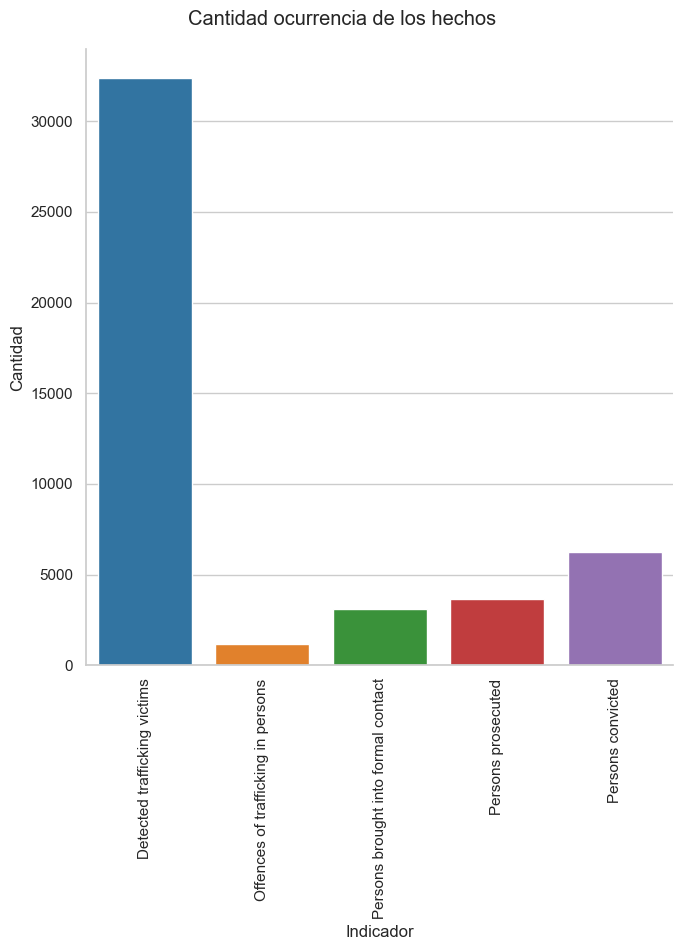

In [29]:
sns.set_style('whitegrid')
sns.set_context('notebook')
g=sns.catplot(x='Indicator',kind='count',data=trata,height=7)
g.set_xticklabels(rotation=90)
g.set(xlabel='Indicador',ylabel='Cantidad')
g.fig.suptitle('Cantidad ocurrencia de los hechos',y=1.03)
g.set_titles('{col_name}s')

plt.show()

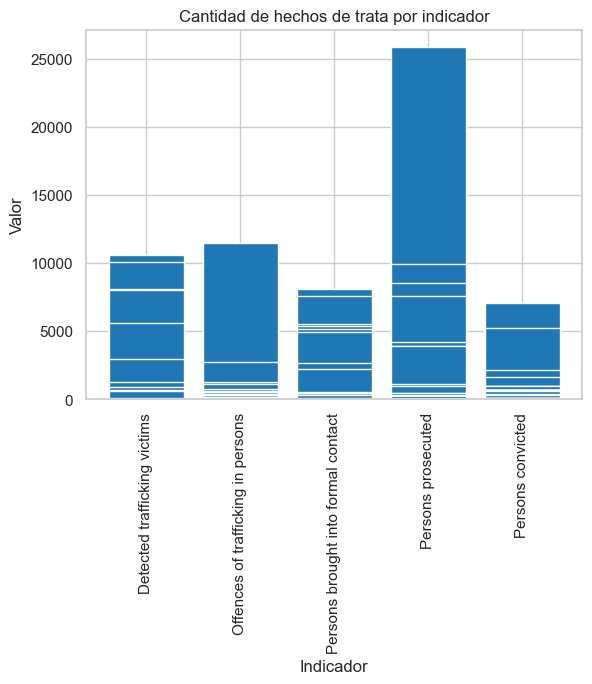

In [30]:
# Crear el gráfico de barras
plt.bar(trata['Indicator'], trata['Value'])

# Personalizar el gráfico 
plt.title('Cantidad de hechos de trata por indicador')
plt.xlabel('Indicador')
plt.ylabel('Valor')
plt.xticks(rotation=90)
# Mostrar el gráfico
plt.show()

